# Зареждаме необходимите библиотеки

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Зареждаме дейтасета от обединените данни 

In [2]:
df_patients = df_patients = pd.read_csv('df_combined.csv')

In [3]:
df_patients

,Unnamed: 0,PATIEND_ID,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,0,0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,1,1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,2,2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,3,3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,4,4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,57,GSM877184,54.0,C,Male,Left,22.0,1.0,0.0,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,58,58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,59,59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,60,60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


In [4]:
#Изтриваме ненужната колона Unnamed: 0
del df_patients['Unnamed: 0']



In [5]:
del df_patients['PATIEND_ID']

In [6]:
df_patients

,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem,117_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,0.0,6.029834,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,0.0,6.344321,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,0.0,5.023127,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,1.0,4.612727,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,1.0,5.865944,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GSM877184,54.0,C,Male,Left,22.0,1.0,0.0,0.0,4.835558,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,0.0,5.694010,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,0.0,8.661629,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,0.0,5.702601,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


## Нека се запознаем с данните 
### Колоните представляват нашите особености за пациента, нека ги съхраним в лист 

In [7]:
features_patients = df_patients.columns.tolist()[1:] 

In [8]:
features_patients

['Age (in years)',
 'Dukes Stage',
 'Gender',
 'Location',
 'DFS (in months)',
 'DFS event',
 'Adj_Radio',
 'Adj_Chem',
 '117_at',
 '1007_s_at',
 '1053_at',
 '121_at',
 '1255_g_at',
 '1294_at',
 '1316_at',
 '1320_at',
 '1405_i_at',
 '1431_at',
 '1438_at',
 '1487_at',
 '1494_f_at',
 '1552256_a_at',
 '1552257_a_at',
 '1552258_at',
 '1552261_at',
 '1552263_at',
 '1552264_a_at',
 '1552266_at',
 '1552269_at',
 '1552271_at',
 '1552272_a_at',
 '1552274_at',
 '1552275_s_at',
 '1552276_a_at',
 '1552277_a_at',
 '1552278_a_at',
 '1552279_a_at',
 '1552280_at',
 '1552281_at',
 '1552283_s_at',
 '1552286_at',
 '1552287_s_at',
 '1552288_at',
 '1552289_a_at',
 '1552291_at',
 '1552293_at',
 '1552295_a_at',
 '1552296_at',
 '1552299_at',
 '1552301_a_at',
 '1552302_at',
 '1552303_a_at',
 '1552304_at',
 '1552306_at',
 '1552307_a_at',
 '1552309_a_at',
 '1552310_at',
 '1552311_a_at',
 '1552312_a_at',
 '1552314_a_at',
 '1552315_at',
 '1552316_a_at',
 '1552318_at',
 '1552319_a_at',
 '1552320_a_at',
 '1552321_a_

In [9]:
df_patients[features_patients].describe()

,Age (in years),DFS (in months),DFS event,Adj_Radio,Adj_Chem,117_at,1007_s_at,1053_at,121_at,1255_g_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,61.112903,41.774194,0.596774,0.532258,0.483871,5.707784,10.220618,7.533482,7.331769,2.982030,...,3.722569,2.697402,3.445108,5.849156,3.437122,4.319765,4.530284,2.580418,7.007763,2.886002
std,9.581582,26.288076,0.494550,0.503032,0.503819,1.141096,0.506397,0.448784,0.346860,0.181438,...,0.194573,0.191073,0.182877,0.466693,0.267659,0.648902,0.329638,0.107296,1.362131,0.274488
min,28.000000,4.000000,0.000000,0.000000,0.000000,4.285183,7.754544,6.119306,6.699796,2.650723,...,3.251912,2.397467,2.994022,4.711967,2.709493,3.168259,3.668514,2.329777,4.983739,2.596916
25%,56.250000,19.500000,0.000000,0.000000,0.000000,4.917209,10.010747,7.306200,7.077712,2.860146,...,3.613045,2.571041,3.323543,5.539251,3.289856,3.894832,4.373952,2.515328,5.864103,2.733037
50%,62.000000,38.000000,1.000000,1.000000,0.000000,5.363241,10.239241,7.500395,7.263498,2.956179,...,3.720273,2.677127,3.438560,5.863188,3.399116,4.205774,4.543968,2.581821,6.831109,2.844452
75%,67.000000,57.500000,1.000000,1.000000,1.000000,6.261369,10.545181,7.763559,7.545533,3.070789,...,3.841272,2.795925,3.572996,6.161970,3.554152,4.676389,4.682515,2.654503,7.687362,2.929875
max,78.000000,108.000000,1.000000,1.000000,1.000000,10.368146,10.996956,8.810034,8.588304,3.572938,...,4.358848,3.473473,3.861362,6.852246,4.414884,6.897634,5.241488,2.764213,11.694707,4.030978


Columns 1 to 50


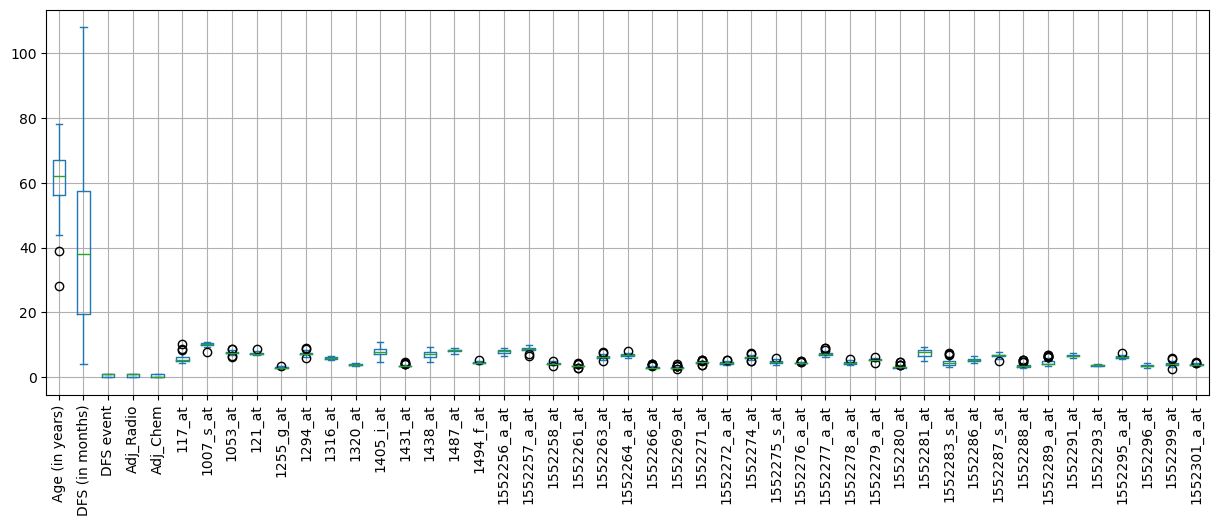

Columns 51 to 100


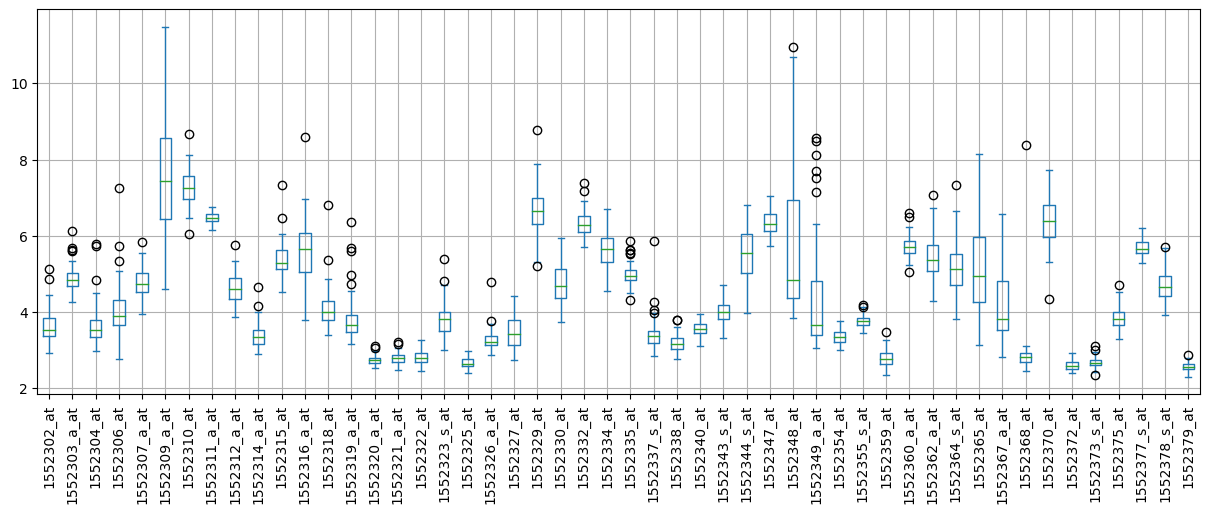

Columns 101 to 150


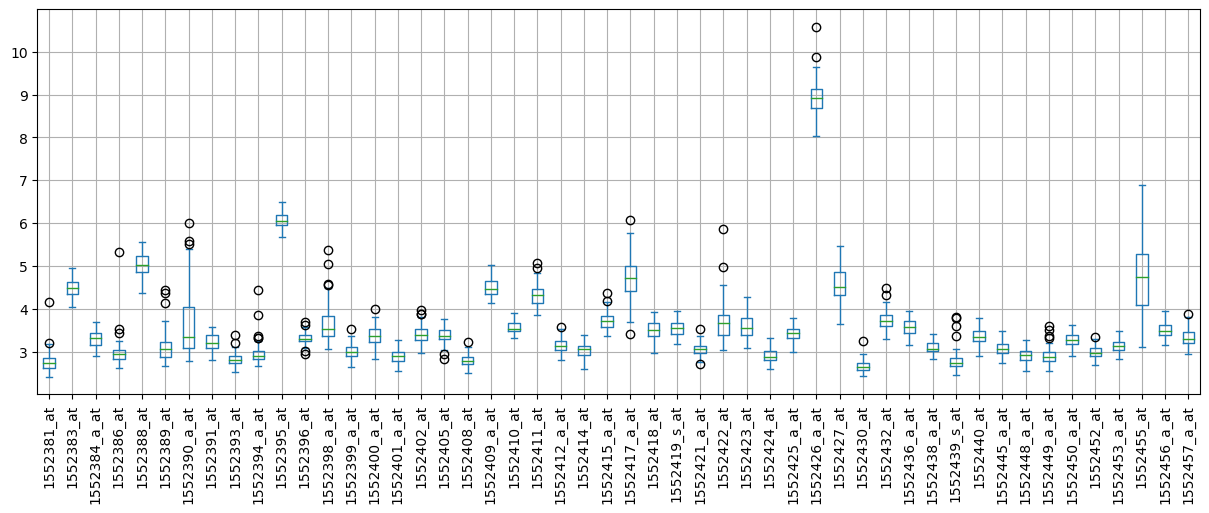

Columns 151 to 200


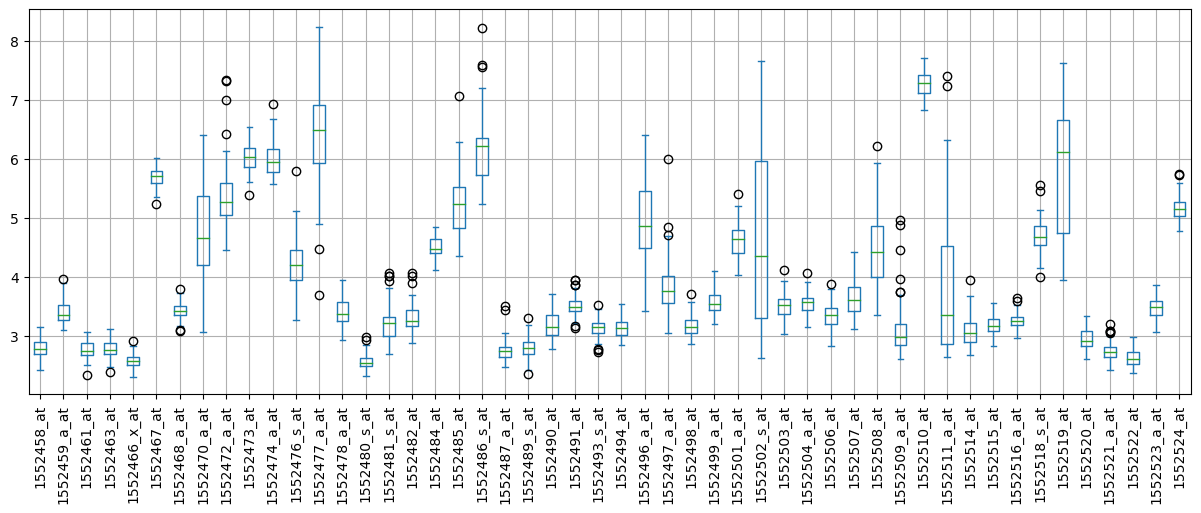

Columns 201 to 250


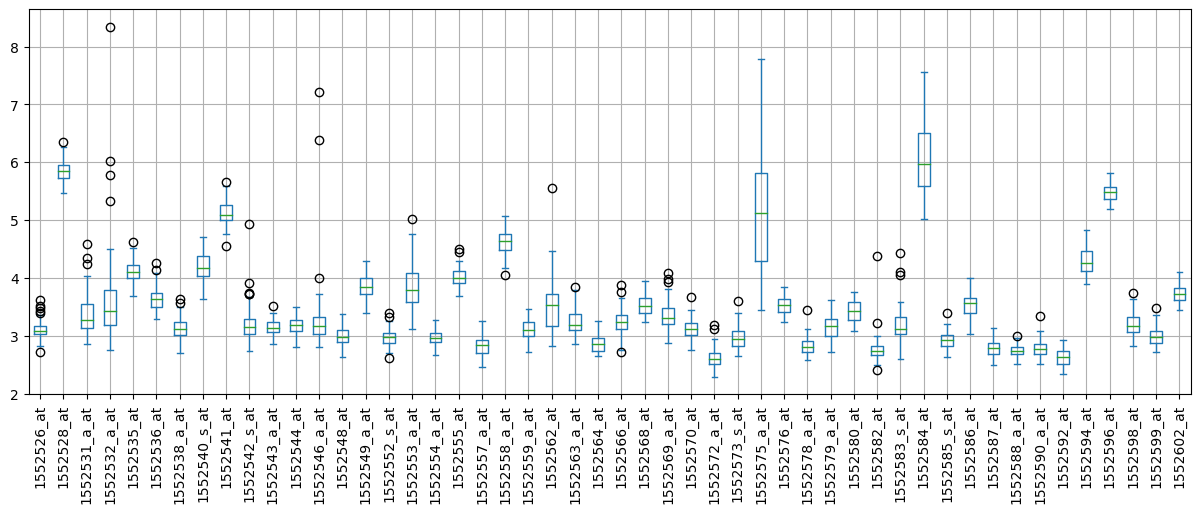

Columns 251 to 300


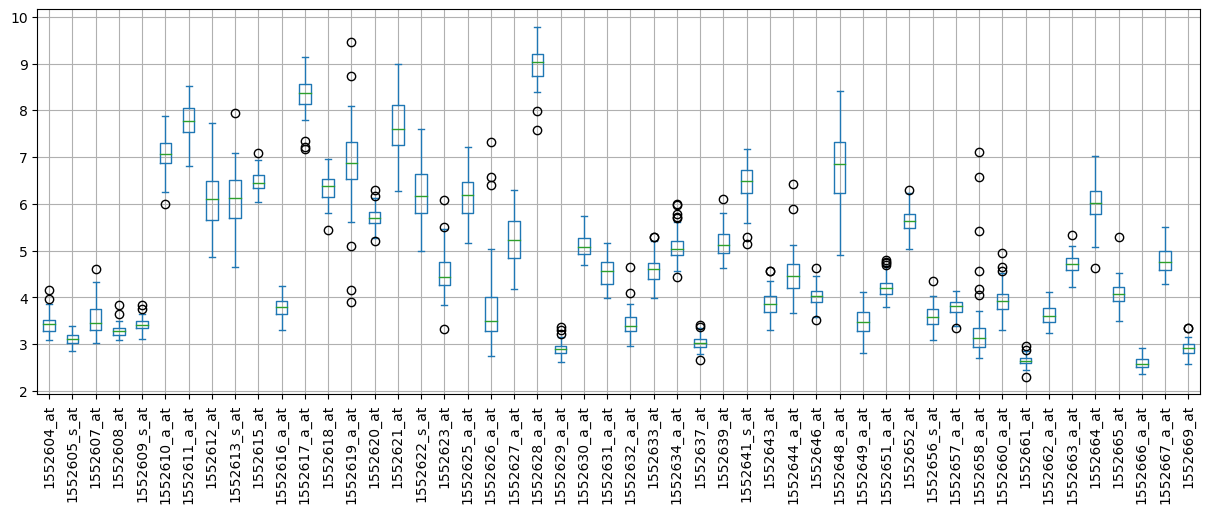

Columns 301 to 350


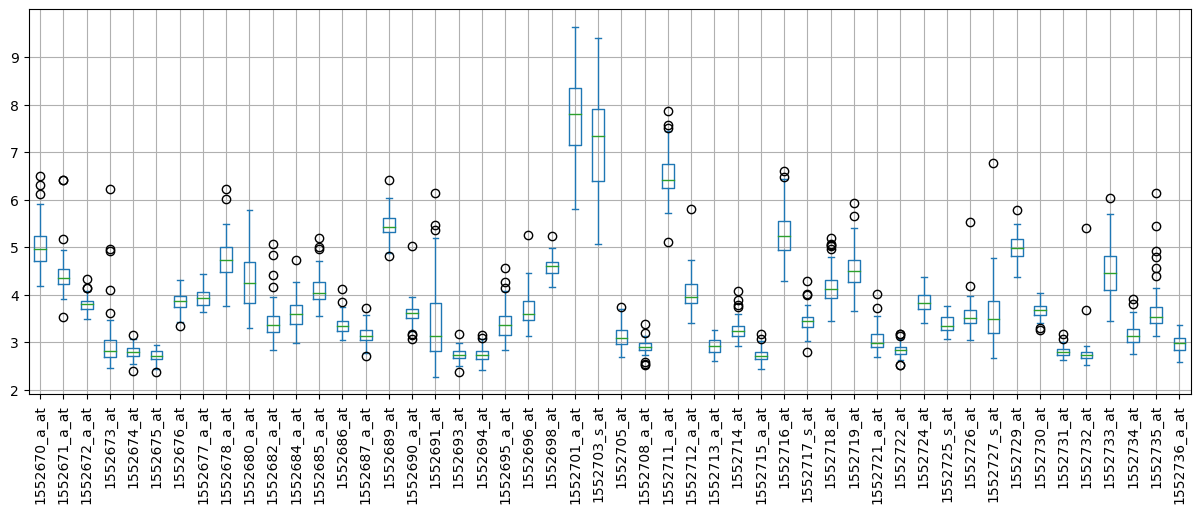

Columns 351 to 400


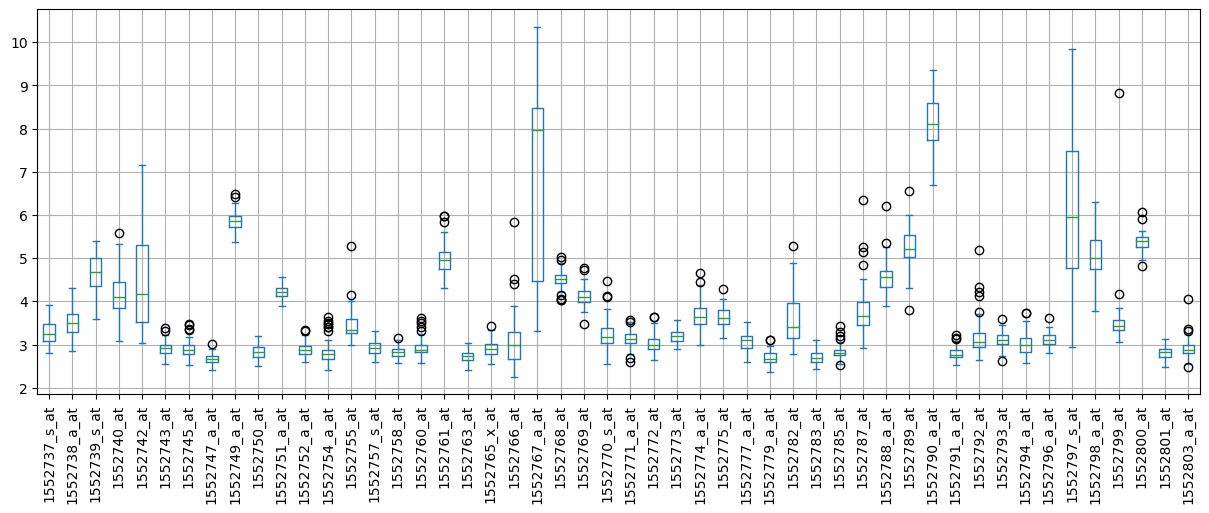

Columns 401 to 450


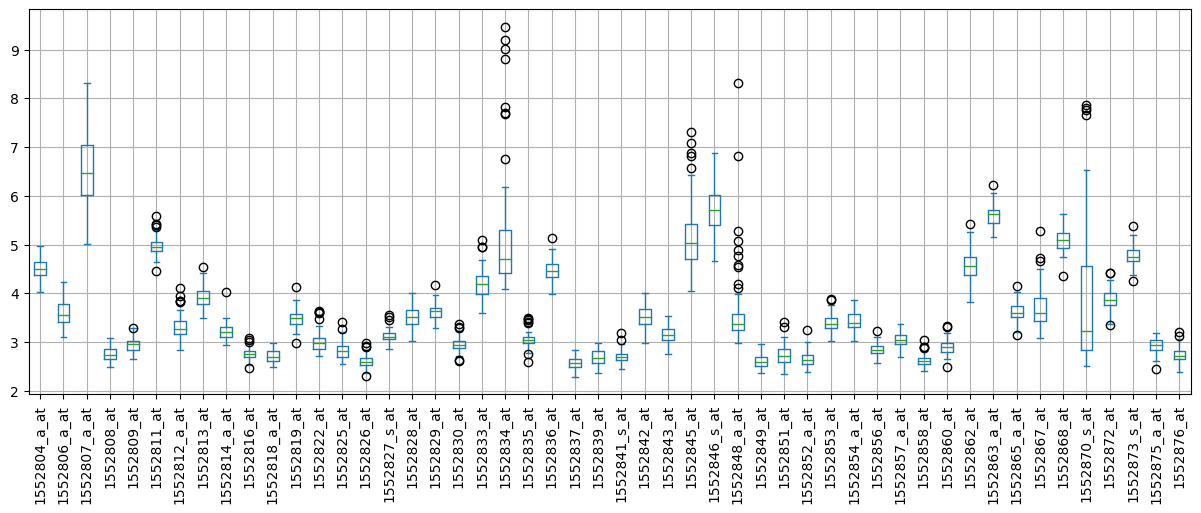

Columns 451 to 500


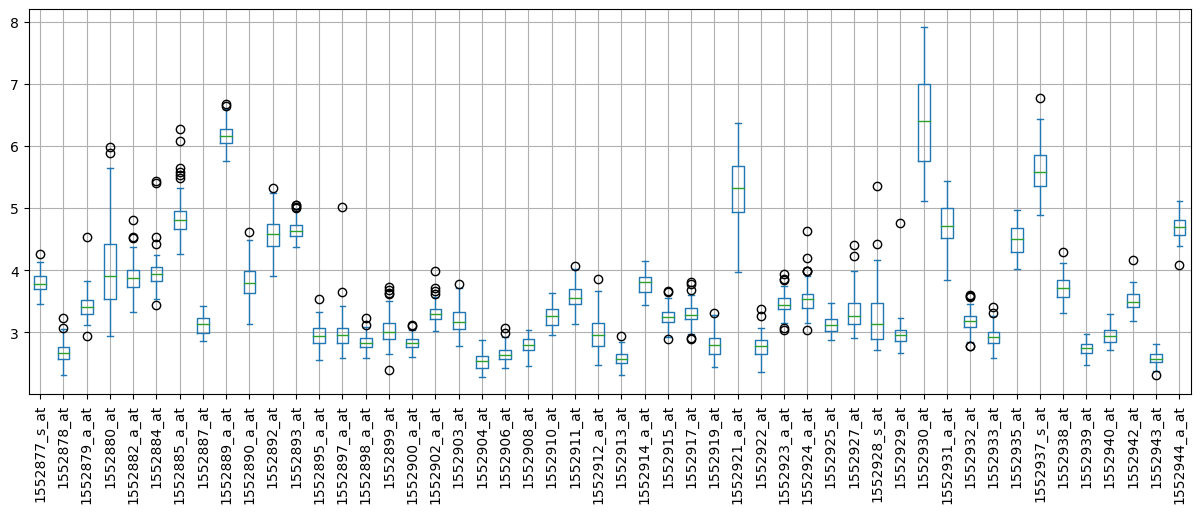

Columns 501 to 550


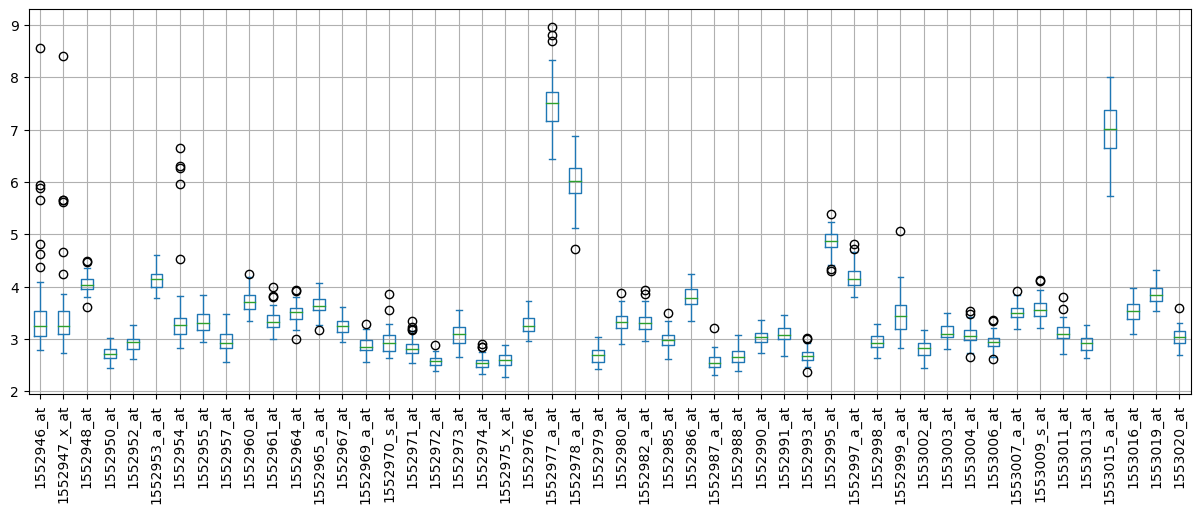

Columns 551 to 600


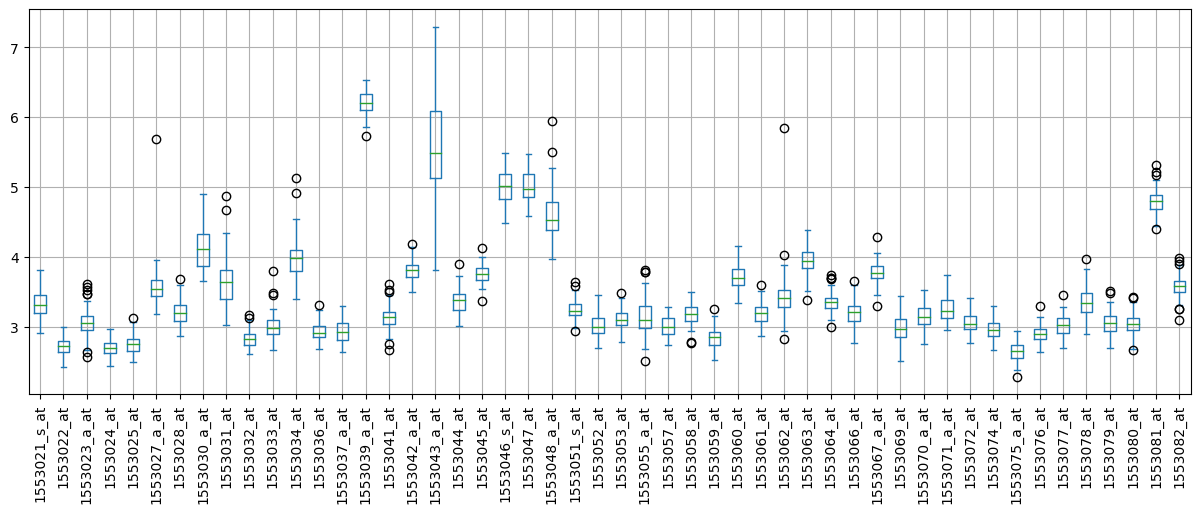

Columns 601 to 650


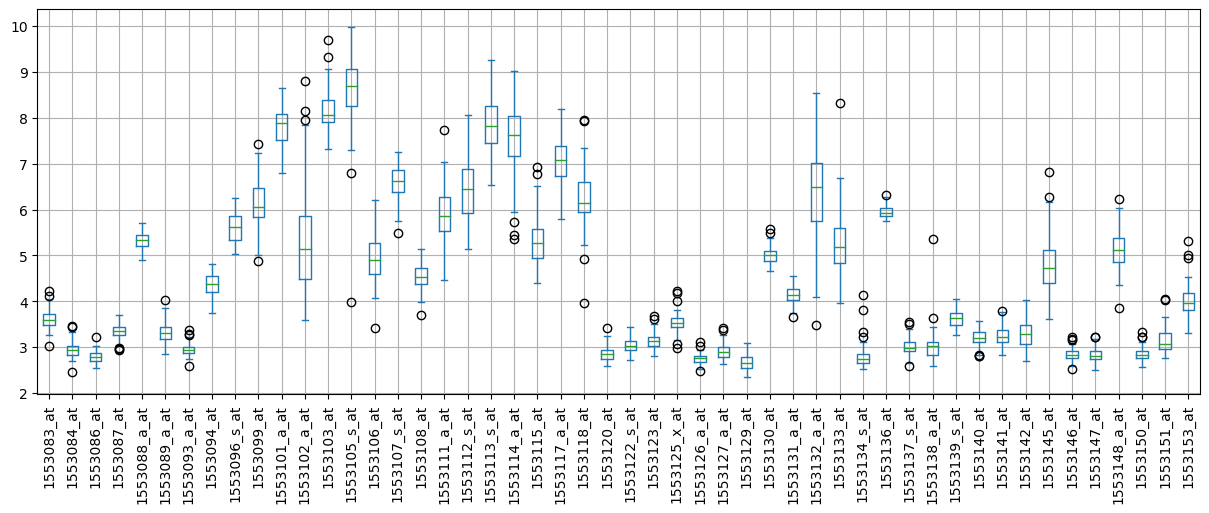

Columns 651 to 700


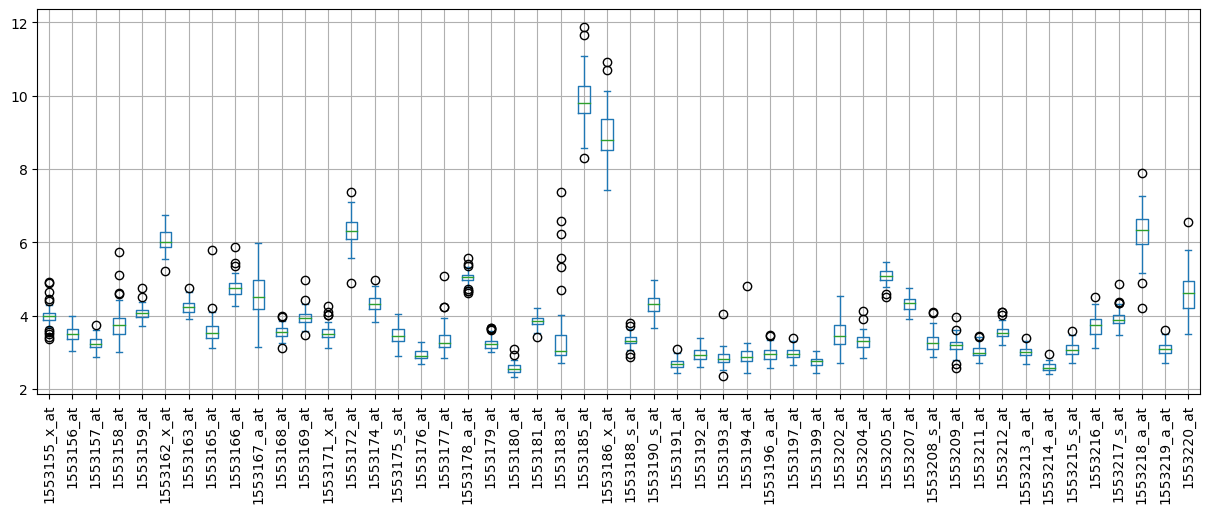

Columns 701 to 750


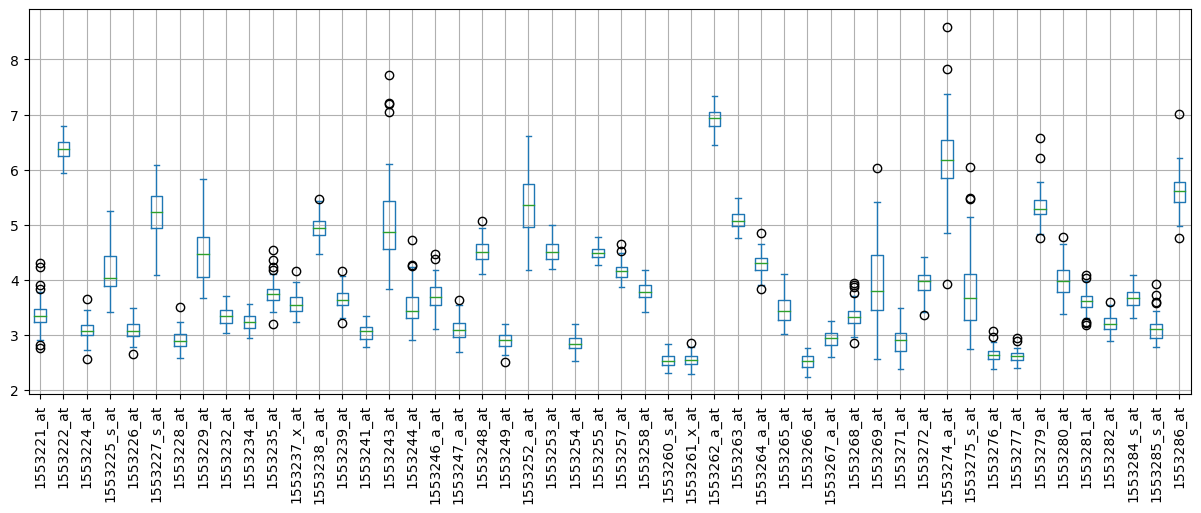

Columns 751 to 800


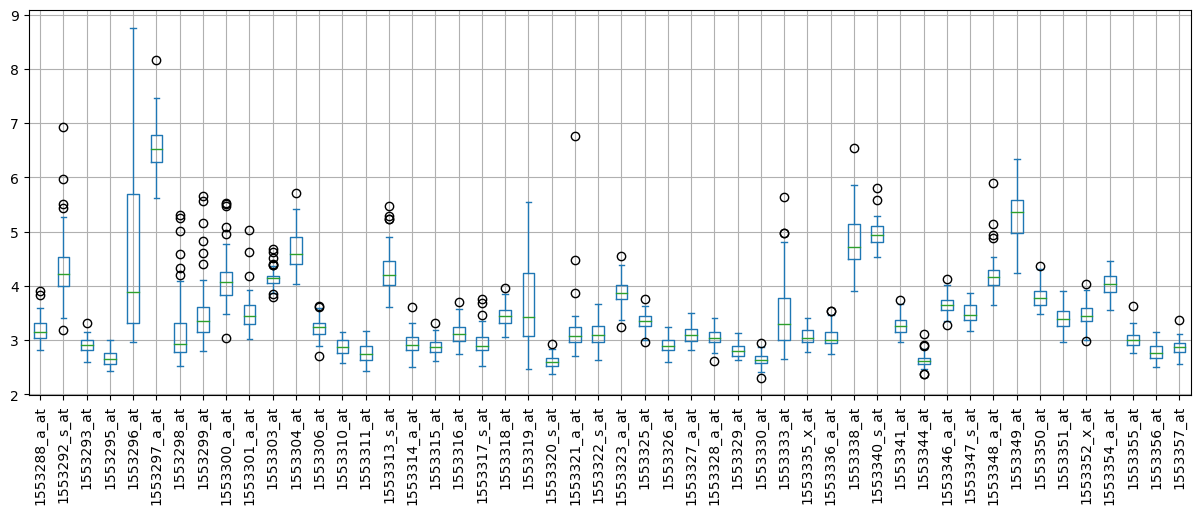

Columns 801 to 850


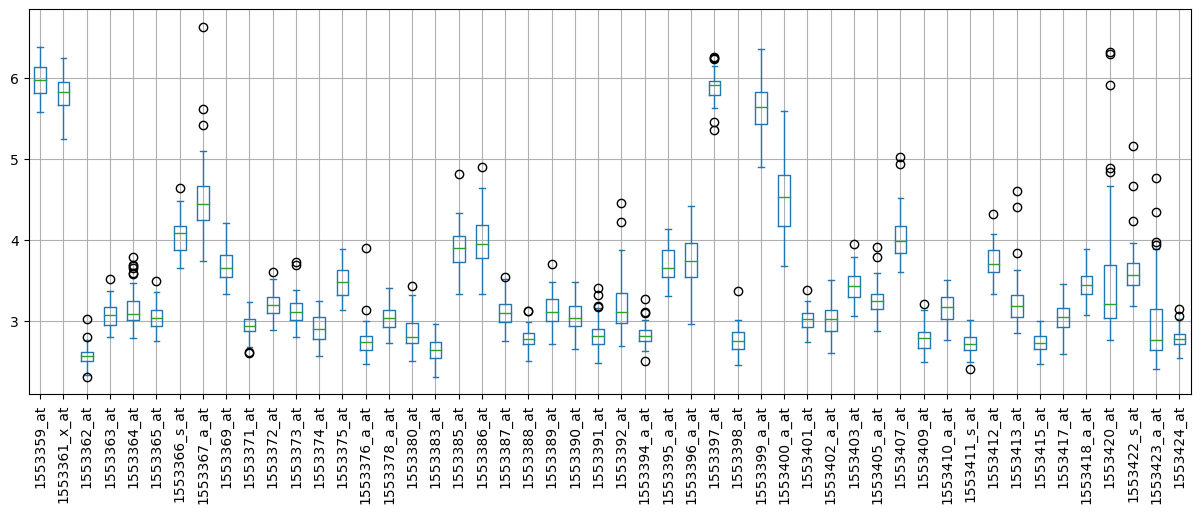

Columns 851 to 900


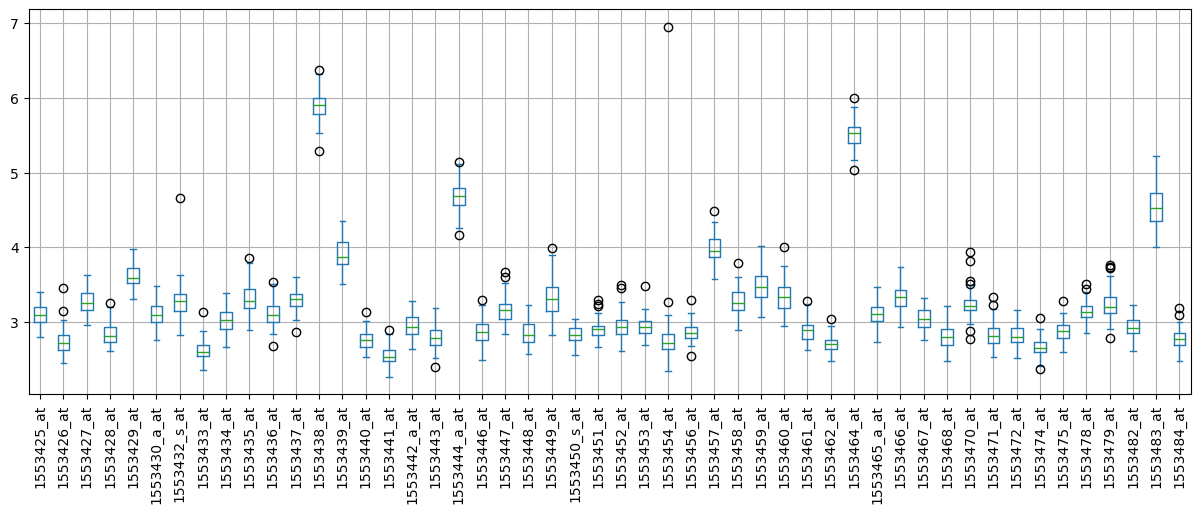

Columns 901 to 950


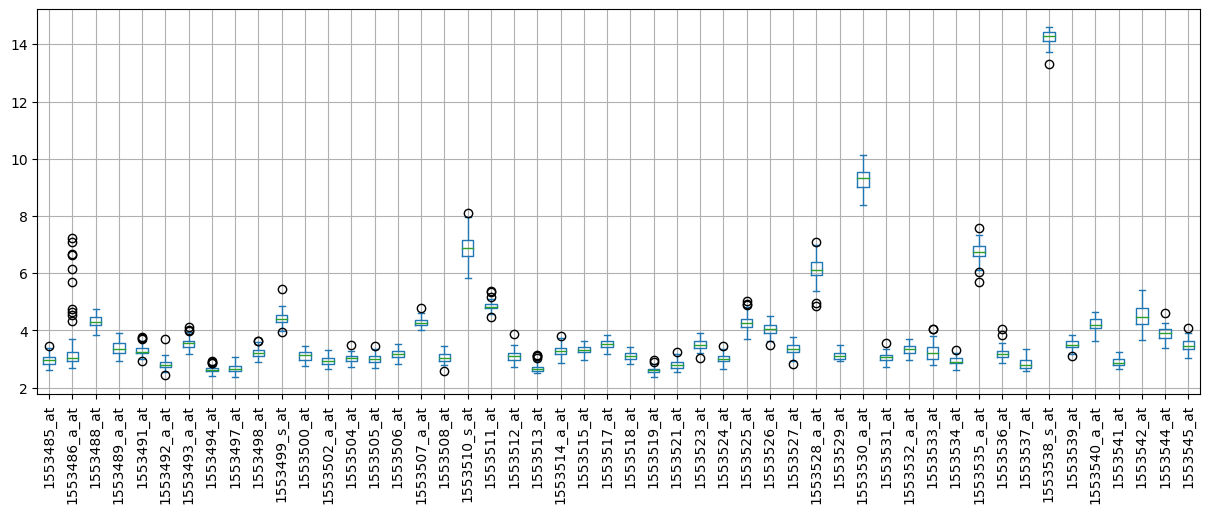

Columns 951 to 1000


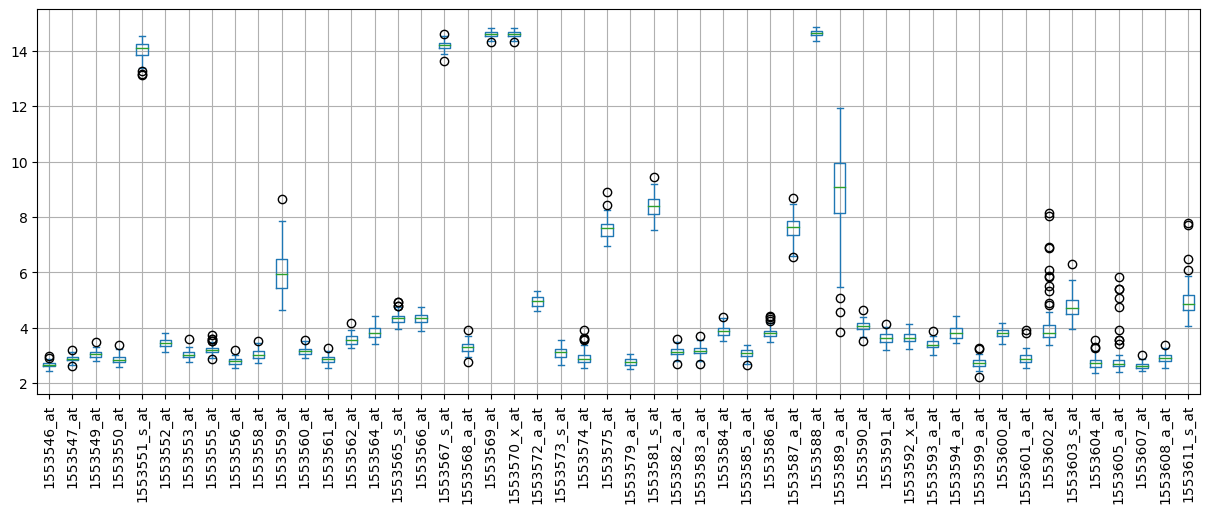

Columns 1001 to 1050


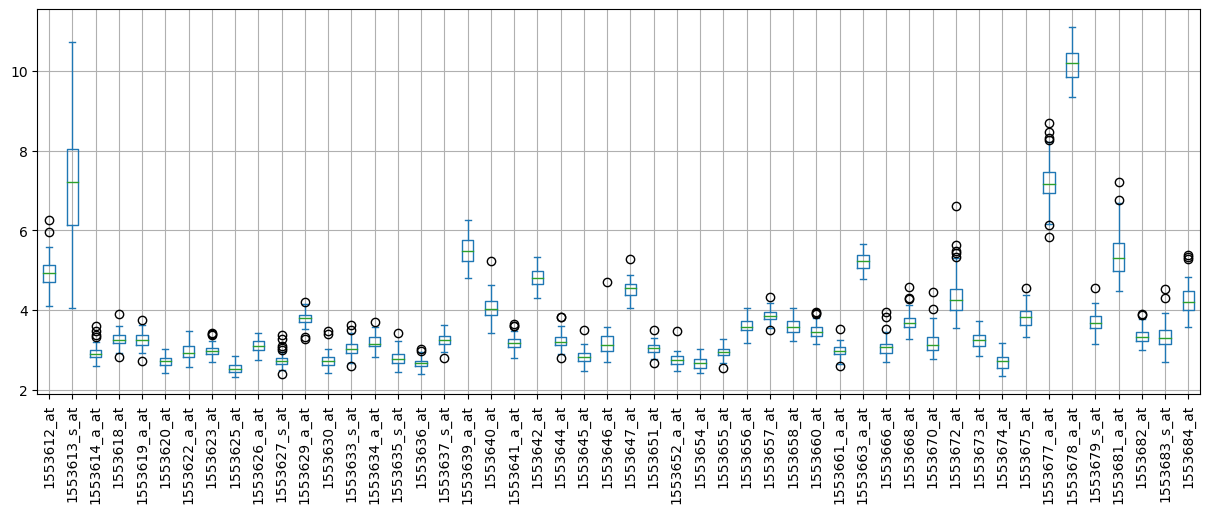

Columns 1051 to 1100


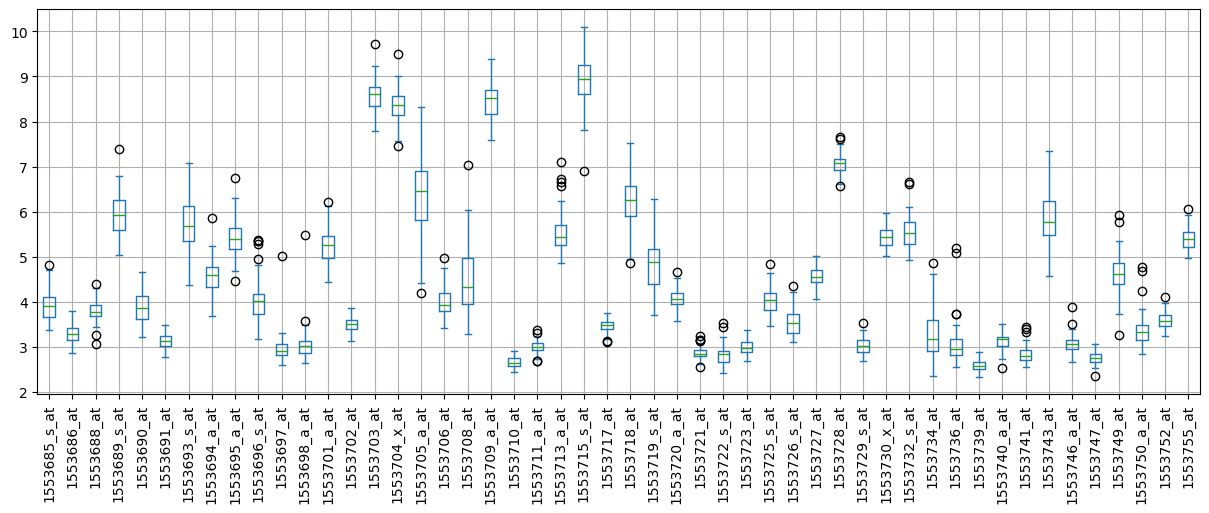

Columns 1101 to 1150


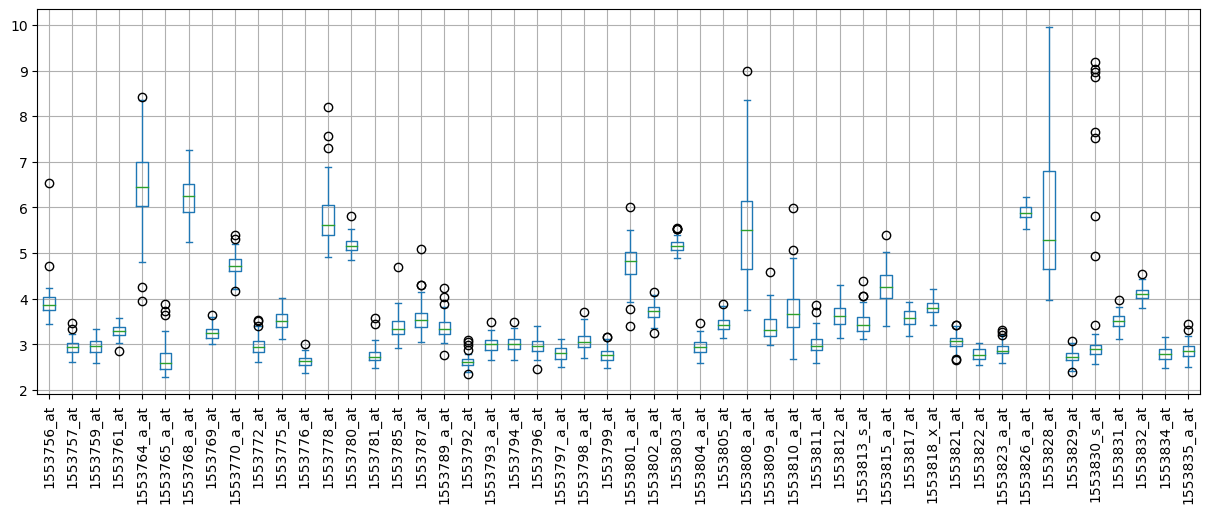

Columns 1151 to 1200


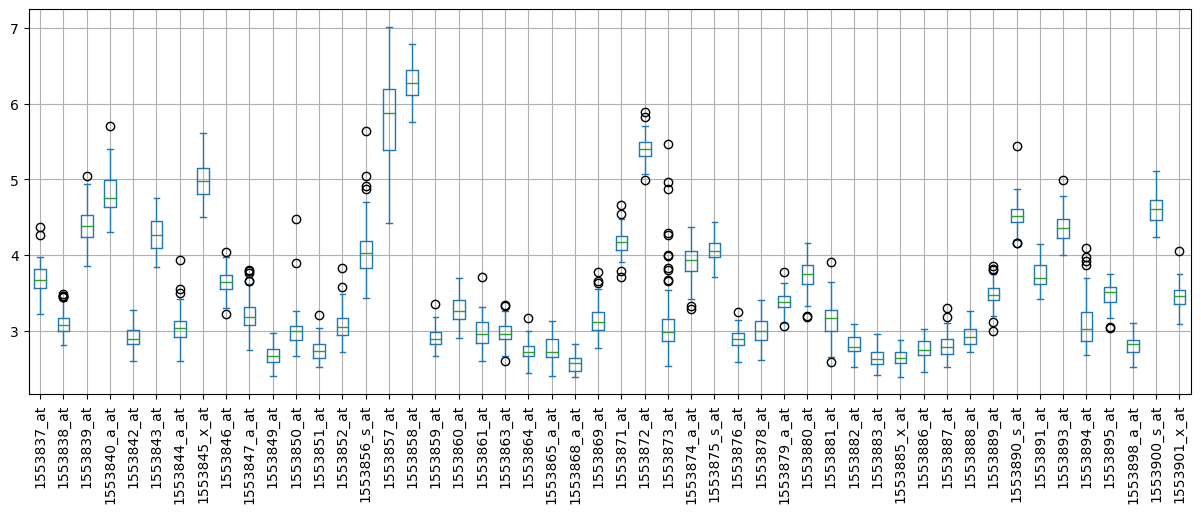

Columns 1201 to 1250


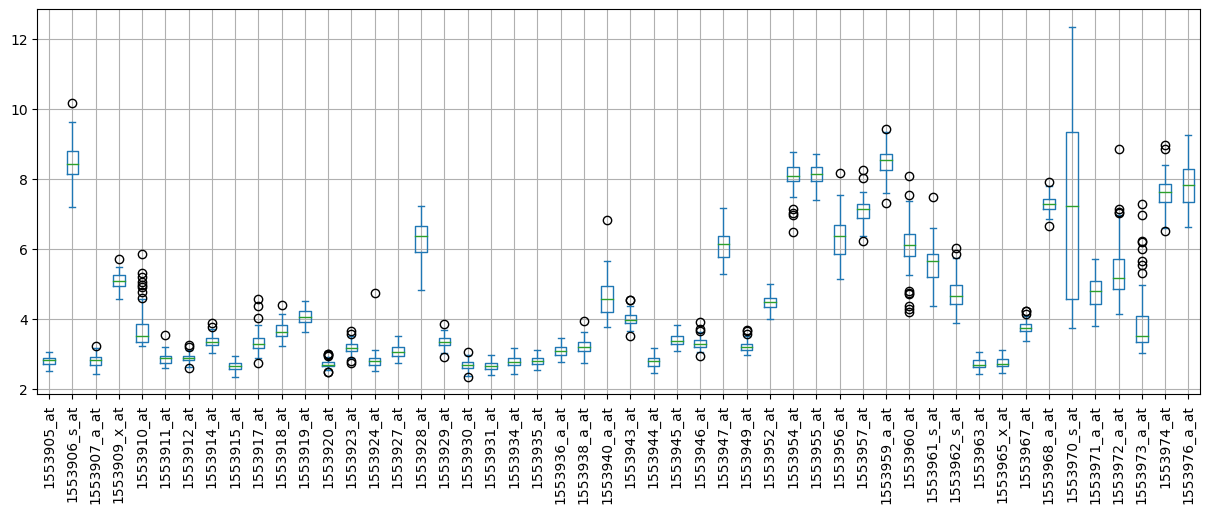

Columns 1251 to 1300


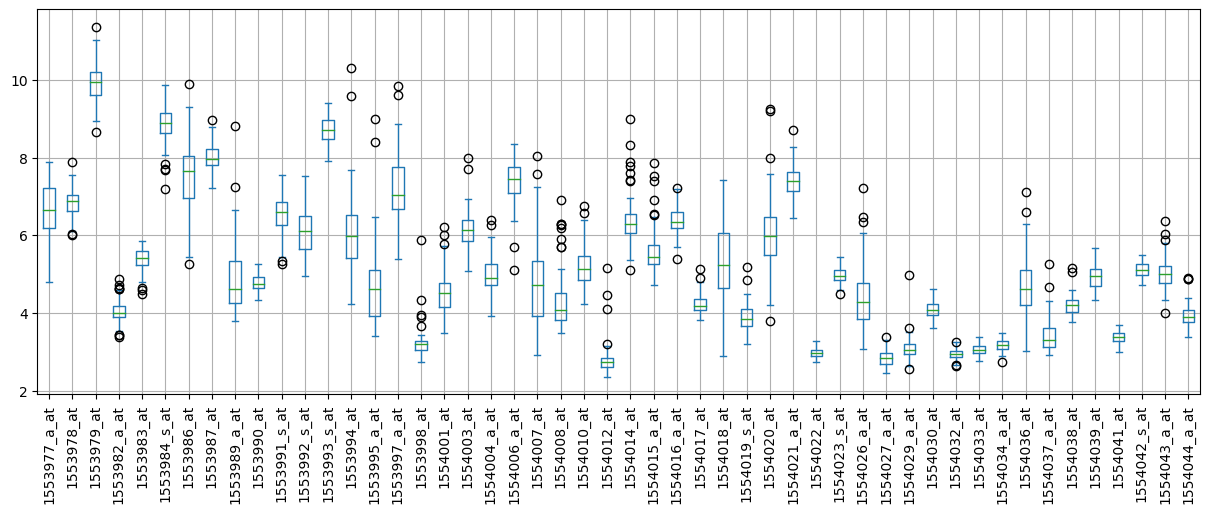

Columns 1301 to 1350


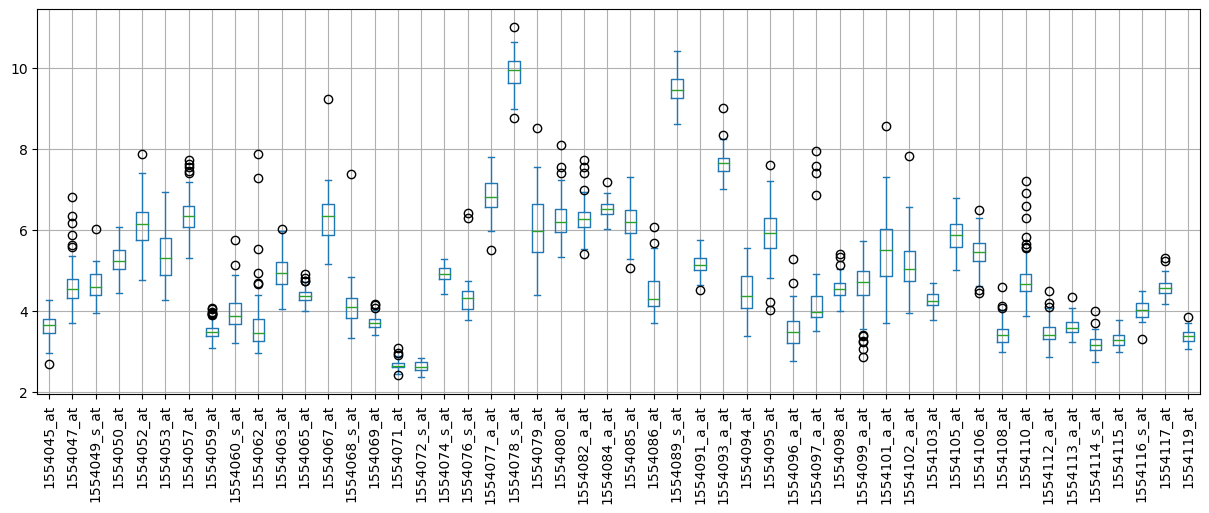

Columns 1351 to 1400


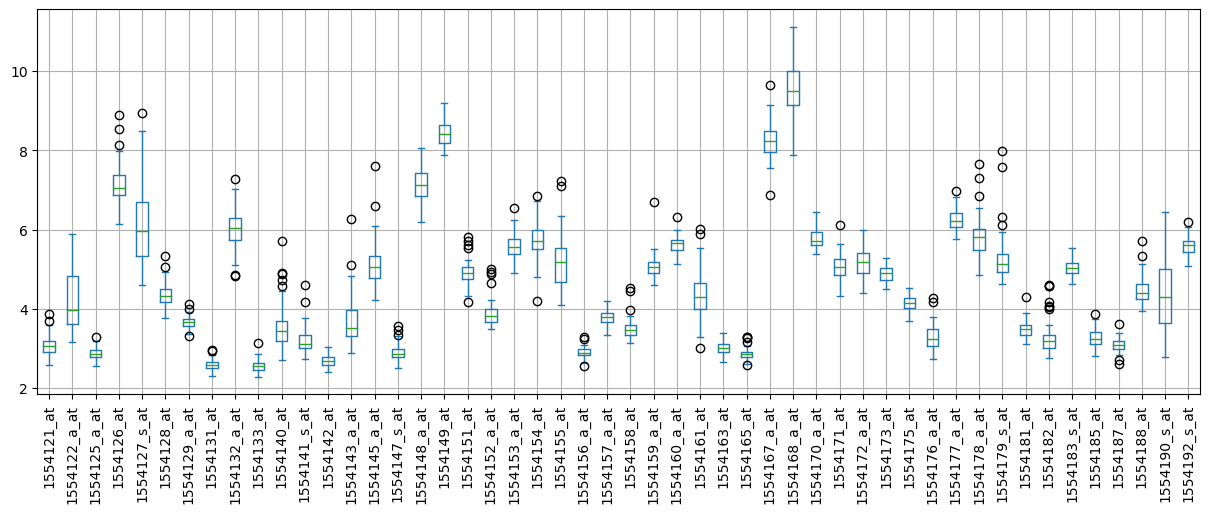

Columns 1401 to 1450


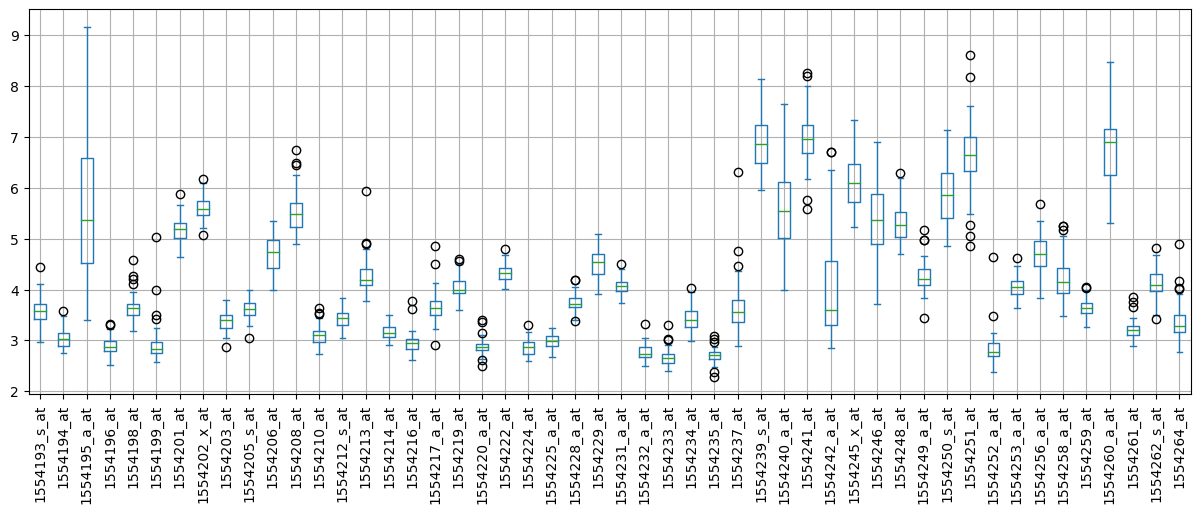

Columns 1451 to 1500


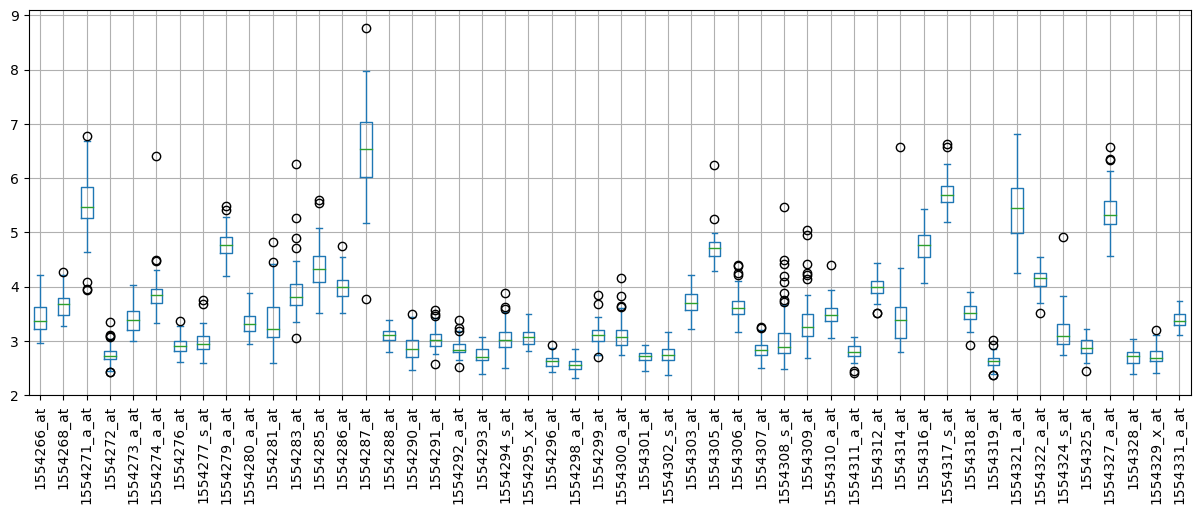

Columns 1501 to 1550


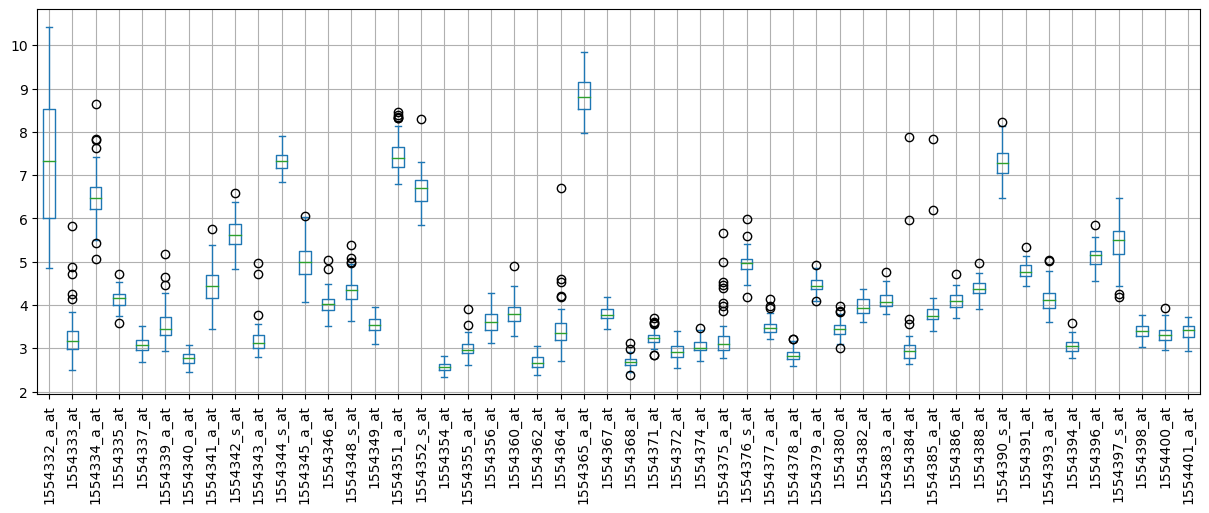

Columns 1551 to 1600


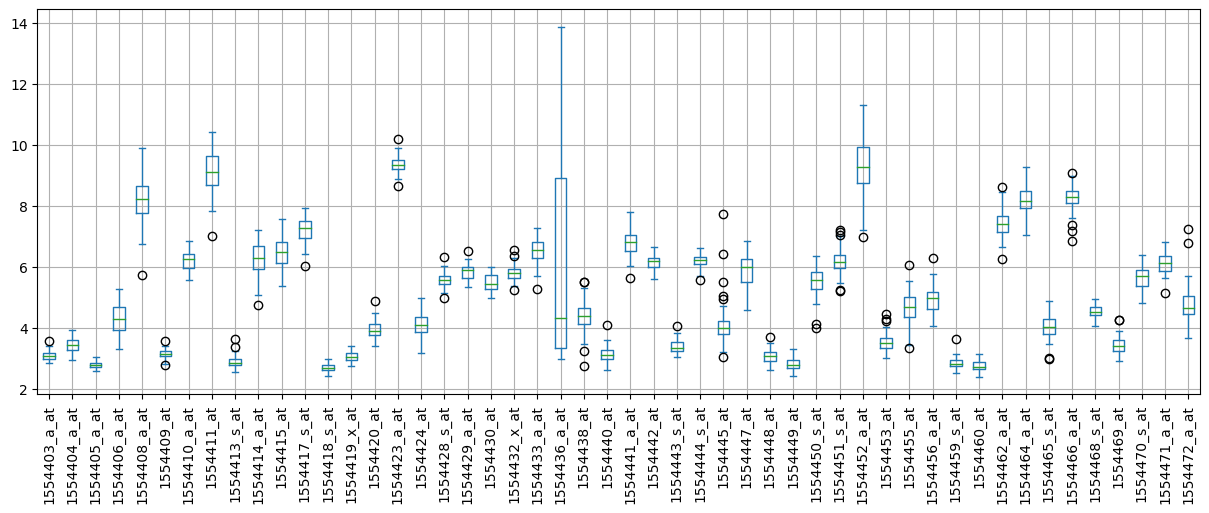

Columns 1601 to 1650


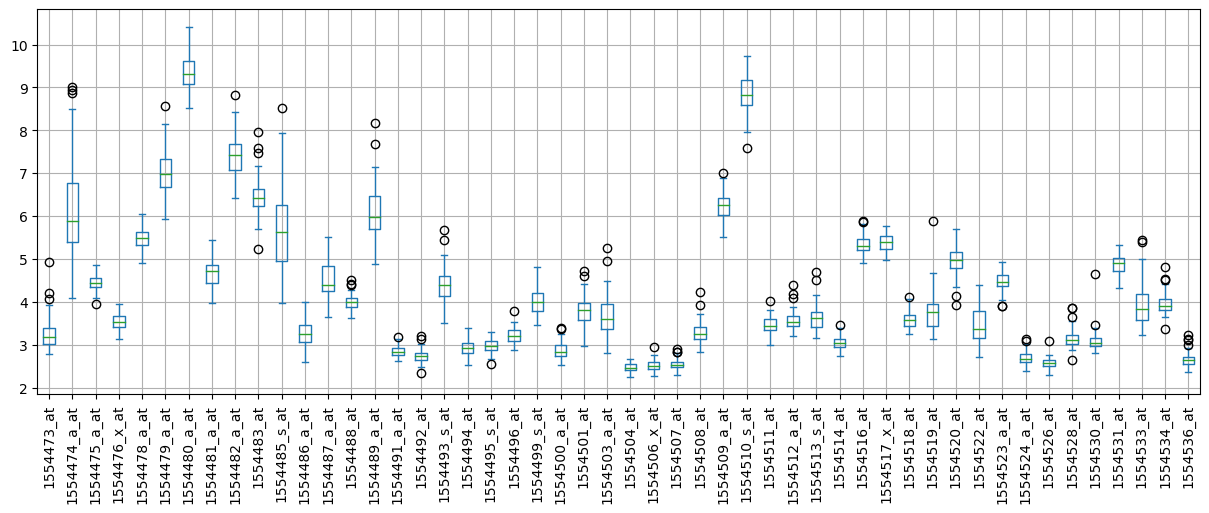

Columns 1651 to 1700


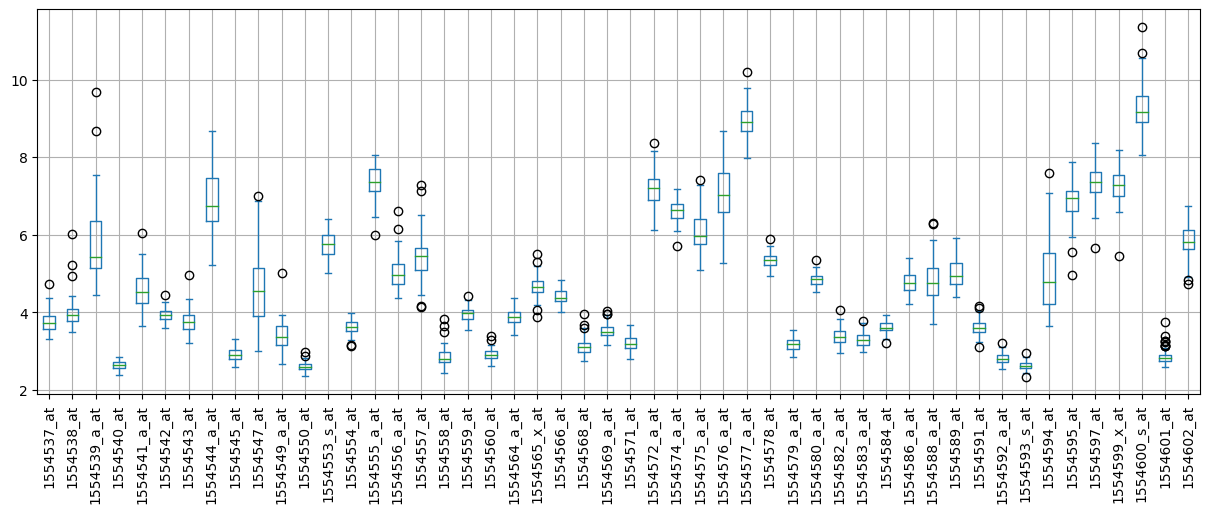

Columns 1701 to 1750


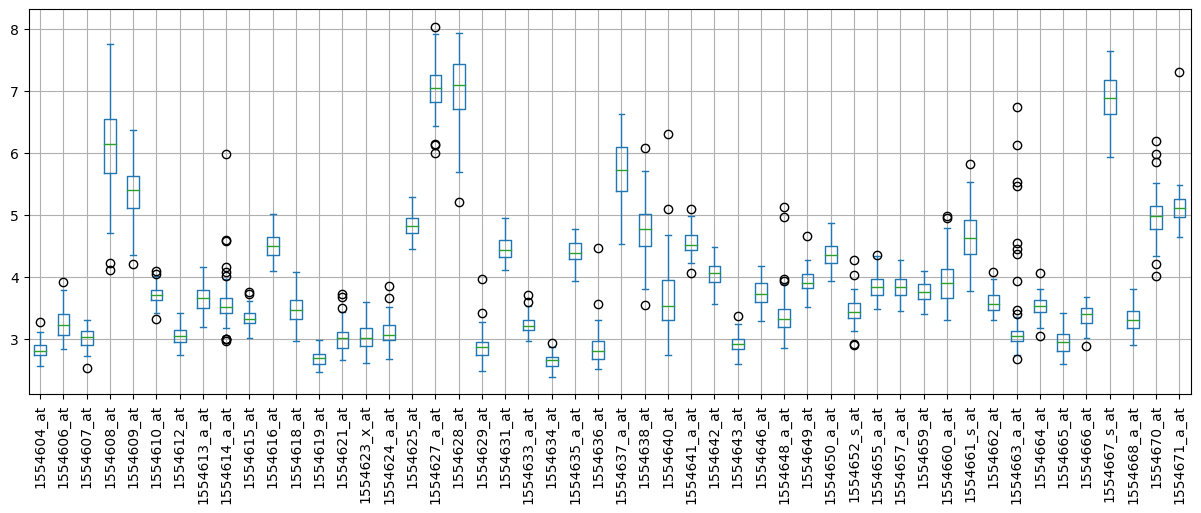

Columns 1751 to 1800


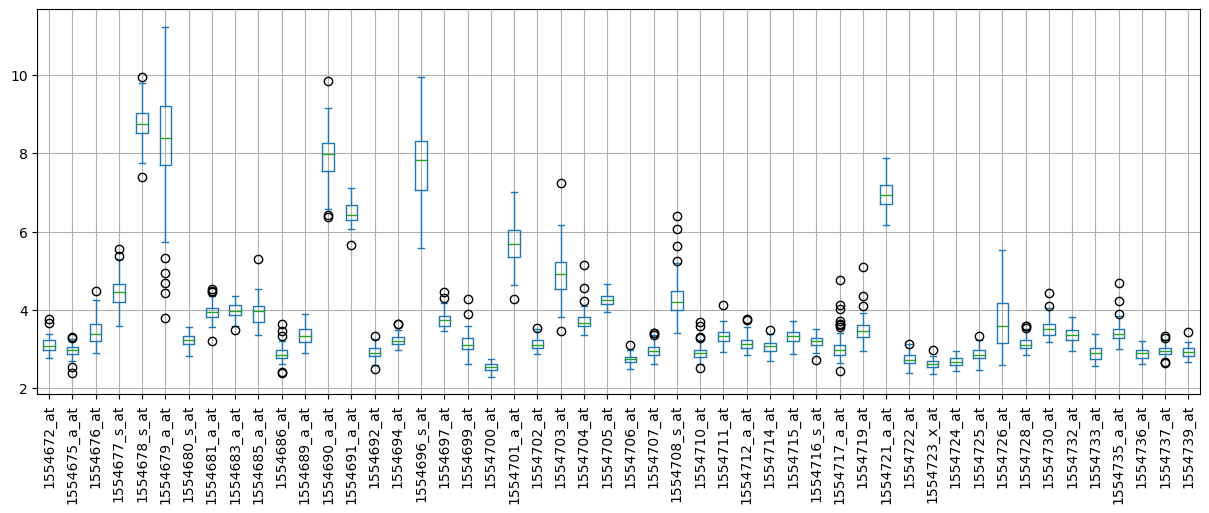

Columns 1801 to 1850


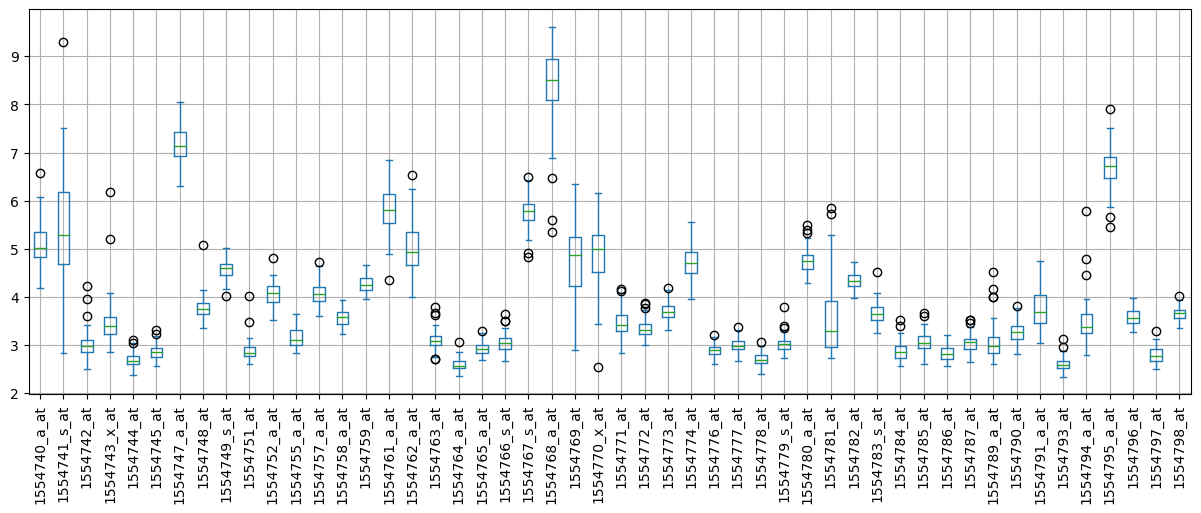

Columns 1851 to 1900


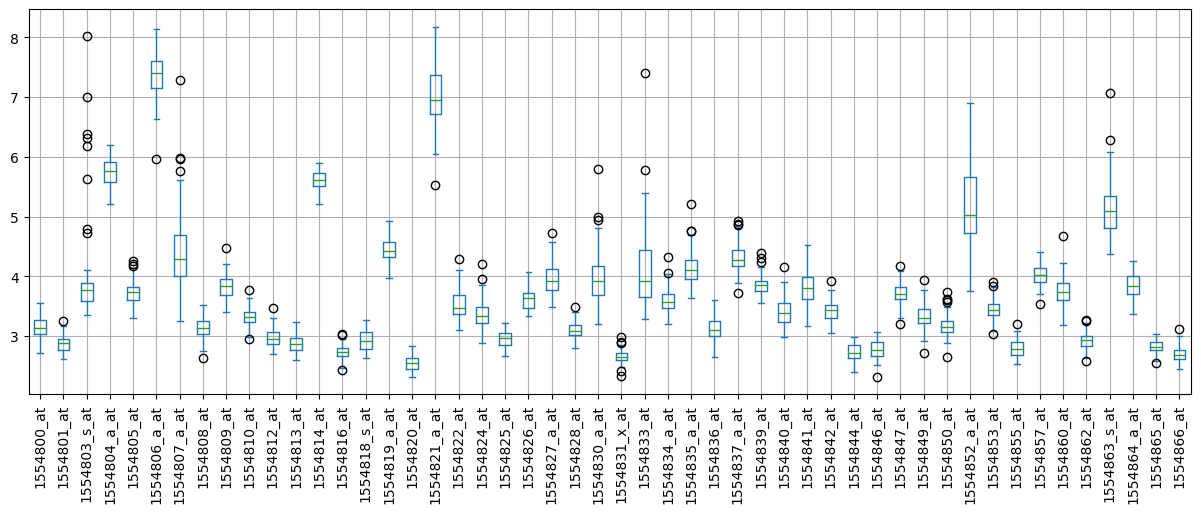

Columns 1901 to 1935


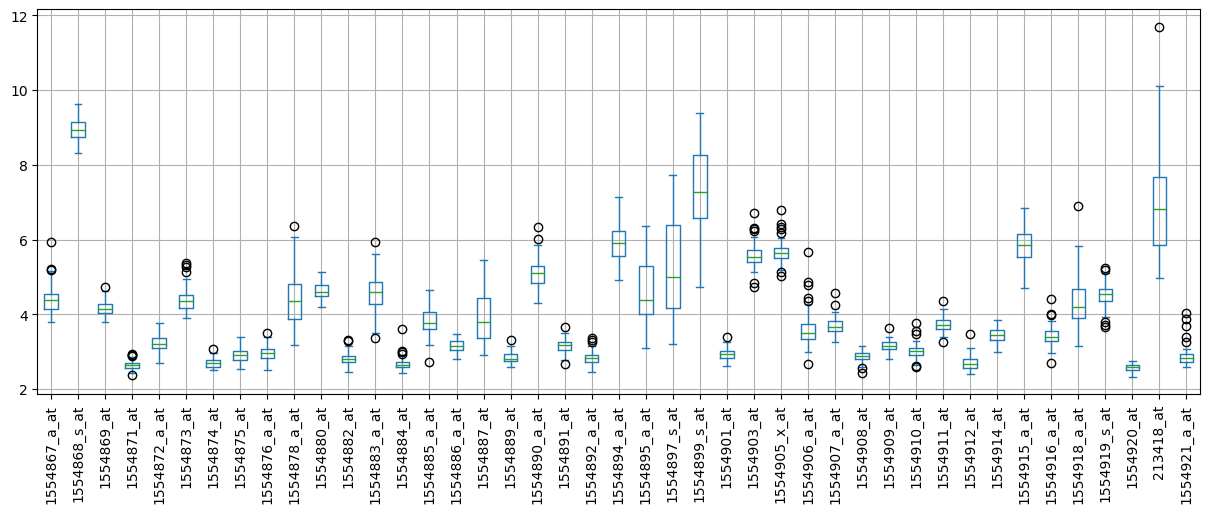

In [10]:
for i in range(38):
    print('Columns', 50*i+1 , 'to', 50*i+50)
    df_patients.iloc[:,50*i+1:50*i+50+1].plot(kind='box', figsize=(15,5))
    plt.xticks(rotation=90)
    plt.grid()
    plt.show()
    
# separate plot for incomplete last block
print('Columns', 1901 , 'to', 1935)
df_patients.iloc[:,1901:1945+1].plot(kind='box', figsize=(15,5))
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [11]:
matrix = df_patients.corr()

C:\Users\Borislav\AppData\Local\Temp\ipykernel_10128\2476679229.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df_patients.corr()


In [ ]:
matrix.style.background_gradient()

In [ ]:
# calc correlation matrix
corr_pearson = df_patients[features_patients].corr(method='pearson')
# mask lower triangle to avoid redundant values later
corr_pearson = corr_pearson.mask(np.tril(np.ones(corr_pearson.shape)).astype(np.bool))

In [ ]:
# convert matrix in data frame
df_corr = pd.DataFrame(corr_pearson).melt(var_name='x2', 
                                          value_name='corr_p',
                                          ignore_index=False)
df_corr.insert(loc=0, column='x1', value=df_corr.index)

# remove redundancies
df_corr = df_corr[~df_corr.corr_p.isna()]

# reset index
df_corr = df_corr.reset_index(drop=True)

In [ ]:
df_corr

In [ ]:
df_corr.nlargest(10, columns='corr_p')

In [ ]:
df_corr.nsmallest(10, columns='corr_p')

In [ ]:
dfs_event = 'DFS event'

In [ ]:
df_test = df_corr[dfs_event]

In [ ]:
dfs_event = 'DFS event'  # Target feature

In [ ]:
selected_columns = features_patients + [dfs_event]
data_selected = df_patients[selected_columns]

# Calculate the correlation matrix
correlation_matrix = data_selected.corr()

# Extract the correlation values for DFS event with all other features
dfs_event_correlation = correlation_matrix[dfs_event]

# Remove the correlation value of DFS event with itself
dfs_event_correlation = dfs_event_correlation.drop(dfs_event)

# Print the correlation values
print(dfs_event_correlation)

In [ ]:
dfs_event_correlation = dfs_event_correlation.iloc[: , 1:]
sorted_correlations = dfs_event_correlation.sort_values(by = ['DFS event'],axis = 0,ascending=False)

In [ ]:
dfs_event_correlation.nsmallest(10, column )

In [ ]:
dfs_event_correlation

In [ ]:
dfs_event_correlation.nlargest(10, columns='DFS event')

In [ ]:
dfs_event_correlation.dtypes

In [ ]:
dfs_event_correlation.corr(method='pearson')

In [ ]:
# convert matrix in data frame
dfs_event_correlation = pd.DataFrame(corr_pearson).melt(var_name='x2', 
                                          value_name='corr_p',
                                          ignore_index=False)
dfs_event_correlation.insert(loc=0, column='x1', value=df_corr.index)

# remove redundancies
dfs_event_correlation = dfs_event_correlation[~df_corr.corr_p.isna()]

# reset index
dfs_event_correlation = dfs_event_correlation.reset_index(drop=True)